### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import io
import requests
import json

### Load Dataset

In [5]:
url = 'https://min-api.cryptocompare.com/data/histoday?fsym=BTC&tsym=USD&limit=2000'
z= requests.get(url)
df = pd.DataFrame(json.loads(z.content)["Data"]).set_index('time')
df.index = pd.to_datetime(df.index, unit='s')
df.head()

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2016-03-15,417.37,412.31,414.31,48596.63,20227610.88,415.13,direct,
2016-03-16,416.95,413.32,415.13,44535.24,18509954.18,415.91,direct,
2016-03-17,419.56,415.33,415.91,43820.66,18409340.68,418.16,direct,
2016-03-18,418.58,402.48,418.16,66068.03,27178165.73,408.16,direct,
2016-03-19,410.49,402.13,408.16,36997.54,15084656.26,408.69,direct,


In [6]:
df.tail()

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2021-09-01,49062.05,46544.74,47159.26,31823.80,1.520961e+09,48840.01,direct,
2021-09-02,50374.89,48632.70,48840.01,32516.15,1.615791e+09,49280.77,direct,
2021-09-03,51056.15,48362.56,49280.77,38496.86,1.926046e+09,50019.51,direct,
2021-09-04,50549.35,49501.12,50019.51,16795.12,8.398889e+08,49935.29,direct,
2021-09-05,50907.45,49499.28,49935.29,13362.83,6.710558e+08,50879.03,direct,


In [7]:
df = df.drop(df.iloc[:,-2:], axis='columns')

In [8]:
df.head()

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2016-03-15,417.37,412.31,414.31,48596.63,20227610.88,415.13
2016-03-16,416.95,413.32,415.13,44535.24,18509954.18,415.91
2016-03-17,419.56,415.33,415.91,43820.66,18409340.68,418.16
2016-03-18,418.58,402.48,418.16,66068.03,27178165.73,408.16
2016-03-19,410.49,402.13,408.16,36997.54,15084656.26,408.69


In [9]:
dataset_test = df.loc['2021-01-01':]

In [10]:
dataset_test

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2021-01-01,29666.33,28748.21,28972.40,50841.73,1.487306e+09,29388.94
2021-01-02,33257.29,29036.26,29388.94,119214.75,3.750441e+09,32203.64
2021-01-03,34789.34,32010.59,32203.64,93510.99,3.132759e+09,33063.48
2021-01-04,33622.70,28493.29,33063.48,124909.68,3.901979e+09,32030.55
2021-01-05,34487.44,29985.29,32030.55,93735.47,3.037657e+09,34038.29
...,...,...,...,...,...,...
2021-09-01,49062.05,46544.74,47159.26,31823.80,1.520961e+09,48840.01
2021-09-02,50374.89,48632.70,48840.01,32516.15,1.615791e+09,49280.77
2021-09-03,51056.15,48362.56,49280.77,38496.86,1.926046e+09,50019.51


In [11]:
dataset_train = df.loc[:'2020-12-31']

In [12]:
dataset_train.head()

,high,low,open,volumefrom,volumeto,close
time,,,,,,
2016-03-15,417.37,412.31,414.31,48596.63,20227610.88,415.13
2016-03-16,416.95,413.32,415.13,44535.24,18509954.18,415.91
2016-03-17,419.56,415.33,415.91,43820.66,18409340.68,418.16
2016-03-18,418.58,402.48,418.16,66068.03,27178165.73,408.16
2016-03-19,410.49,402.13,408.16,36997.54,15084656.26,408.69


In [13]:
train_set = dataset_train.iloc[:, -1:].values

### Feature Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_set_scaled = sc.fit_transform(train_set)

### Create 60 TimeSteps and 1 Output

In [16]:
X_train = []
y_train = []
for i in range(60, 1753):
    X_train.append(train_set_scaled[i-60:i, 0])
    y_train.append(train_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshape

In [17]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


## Build and Train RNN

### Import Keras Libraries

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialize RNN

In [19]:
regressor = Sequential()

### Adding the LSTM layers and some Dropout regularisation

In [20]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [21]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [22]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [23]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Add Output Layer

In [24]:
regressor.add(Dense(units = 1))

### Compile RNN

In [28]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fit RNN to Train Set

In [29]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
53/53 [==============================] - 56s 114ms/step - loss: 0.0181
Epoch 2/100
53/53 [==============================] - 6s 113ms/step - loss: 0.0026
Epoch 3/100
53/53 [==============================] - 6s 114ms/step - loss: 0.0024
Epoch 4/100
53/53 [==============================] - 6s 114ms/step - loss: 0.0020
Epoch 5/100
53/53 [==============================] - 6s 113ms/step - loss: 0.0025
Epoch 6/100
53/53 [==============================] - 6s 114ms/step - loss: 0.0018
Epoch 7/100
53/53 [==============================] - 6s 113ms/step - loss: 0.0017
Epoch 8/100
53/53 [==============================] - 6s 114ms/step - loss: 0.0021
Epoch 9/100
53/53 [==============================] - 6s 113ms/step - loss: 0.0019
Epoch 10/100
53/53 [==============================] - 6s 114ms/step - loss: 0.0013
Epoch 11/100
53/53 [==============================] - 6s 114ms/step - loss: 0.0014
Epoch 12/100
53/53 [==============================] - 6s 119ms/step - loss: 0.0014
Epoch 13/100

53/53 [==============================] - 8s 143ms/step - loss: 7.0270e-04
Epoch 97/100
53/53 [==============================] - 7s 138ms/step - loss: 6.4178e-04
Epoch 98/100
53/53 [==============================] - 8s 143ms/step - loss: 5.5056e-04
Epoch 99/100
53/53 [==============================] - 8s 153ms/step - loss: 5.3932e-04
Epoch 100/100
53/53 [==============================] - 7s 136ms/step - loss: 4.8612e-04


## Making the predictions and visualising the results¶

In [30]:
real_bitcoin_price = dataset_test.iloc[:, -1:].values

In [35]:
real_bitcoin_price.shape

(248, 1)

### Getting the predicted bitcoin price of 2021

In [36]:
dataset_total = pd.concat((dataset_train['close'], dataset_test['close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 308):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_bitcoin_price = regressor.predict(X_test)
predicted_bitcoin_price = sc.inverse_transform(predicted_bitcoin_price)

### Visualising the results

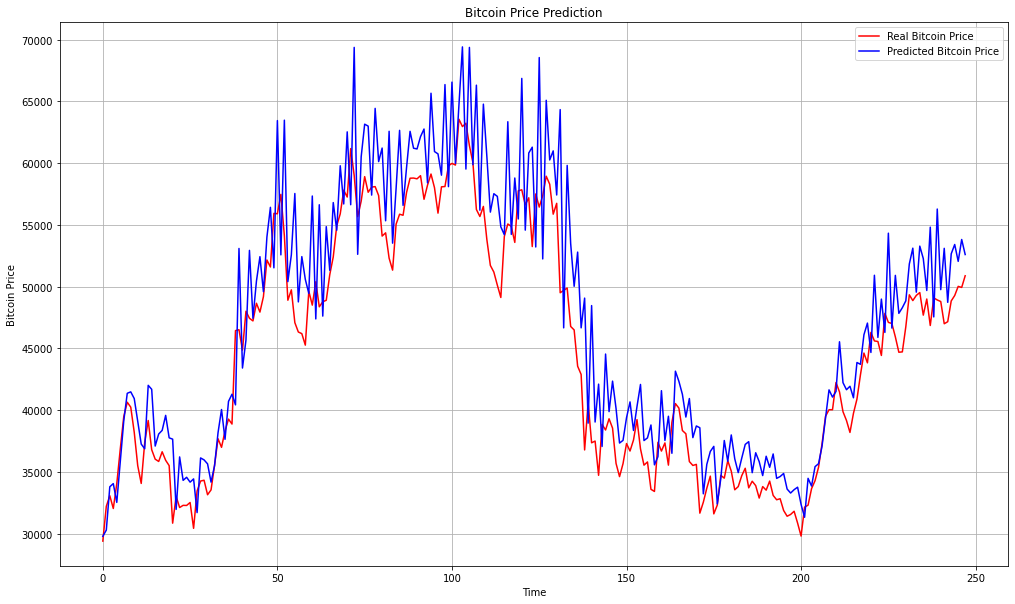

In [37]:
plt.figure(figsize=(17,10))
plt.plot(real_bitcoin_price, color = 'red', label = 'Real Bitcoin Price')
plt.plot(predicted_bitcoin_price, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.grid()
plt.show()

In [38]:
from sklearn.metrics import accuracy_score